In [2]:
# ----------
#
# In this exercise, you will update the perceptron class so that it can update
# its weights.
#
# Finish writing the update() method so that it updates the weights according
# to the perceptron update rule. Updates should be performed online, revising
# the weights after each data point.
#
# YOUR CODE WILL GO IN LINES 51 AND 59.
# ----------

import numpy as np

class Perceptron:
    """
    This class models an artificial neuron with step activation function.
    """
    def __init__(self, weights = np.array([1]), threshold = 0):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        self.weights = weights.astype(float) 
        self.threshold = threshold


    def activate(self, values):
        """
        Takes in @param values, a list of numbers equal to length of weights.
        @return the output of a threshold perceptron with given inputs based on
        perceptron weights and threshold.
        """
        # First calculate the strength with which the perceptron fires
        strength = np.dot(values,self.weights)
        # Then return 0 or 1 depending on strength compared to threshold  
        return int(strength > self.threshold)


    def update(self, values, train, eta=.1):
        """
        Takes in a 2D array @param values consisting of a LIST of inputs and a
        1D array @param train, consisting of a corresponding list of expected
        outputs. Updates internal weights according to the perceptron training
        rule using these values and an optional learning rate, @param eta.
        """

  #      # For each data point:
  #      for data_point in xrange(len(values)):
  #          # TODO: Obtain the neuron's prediction for the data_point --> values[data_point]
  #          prediction = self.activate(# TODO)
  #          # Get the prediction accuracy calculated as (expected value - predicted value)
  #          # expected value = train[data_point], predicted value = prediction
  #          error = train[data_point] - prediction
  #          # TODO: update self.weights based on the multiplication of:
  #          # - prediction accuracy(error)
  #          # - learning rate(eta)
  #          # - input value(values[data_point])
  #         weight_update = # TODO
  #         self.weights += weight_update

 # TODO: for each data point...
        for i in range(len(train)):
            # TODO: obtain the neuron's prediction for that point
            prediction = self.activate(values[i])
            print("prediction for i=", i, " : ", prediction)
            print("train for i=", i, " : ", train[i])
            # TODO: update self.weights based on prediction accuracy, learning
            # rate and input value
            for j in range(len(self.weights)):
                #ETA = LEARNING RATE
                weight_delta = eta * (train[i] - prediction) * values [i][j]
                
                print("weight_delta for j=", j, " : ", weight_delta)
                self.weights[j] = self.weights[j] + weight_delta
                print("self.weights after j=", j, " is now ", self.weights)
            print("self.weights after ", i, " is now ", self.weights)


def test():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """
    def sum_almost_equal(array1, array2, tol = 1e-6):
        return sum(abs(array1 - array2)) < tol

    p1 = Perceptron(np.array([1,1,1]),0)
    p1.update(np.array([[2,0,-3]]), np.array([1]))
    assert sum_almost_equal(p1.weights, np.array([1.2, 1, 0.7]))

    p2 = Perceptron(np.array([1,2,3]),0)
    p2.update(np.array([[3,2,1],[4,0,-1]]),np.array([0,0]))
    assert sum_almost_equal(p2.weights, np.array([0.7, 1.8, 2.9]))

    p3 = Perceptron(np.array([3,0,2]),0)
    p3.update(np.array([[2,-2,4],[-1,-3,2],[0,2,1]]),np.array([0,1,0]))
    assert sum_almost_equal(p3.weights, np.array([2.7, -0.3, 1.7]))

if __name__ == "__main__":
    test()

prediction for i= 0  :  0
train for i= 0  :  1
weight_delta for j= 0  :  0.2
self.weights after j= 0  is now  [ 1.2  1.   1. ]
weight_delta for j= 1  :  0.0
self.weights after j= 1  is now  [ 1.2  1.   1. ]
weight_delta for j= 2  :  -0.3
self.weights after j= 2  is now  [ 1.2  1.   0.7]
self.weights after  0  is now  [ 1.2  1.   0.7]
prediction for i= 0  :  1
train for i= 0  :  0
weight_delta for j= 0  :  -0.3
self.weights after j= 0  is now  [ 0.7  2.   3. ]
weight_delta for j= 1  :  -0.2
self.weights after j= 1  is now  [ 0.7  1.8  3. ]
weight_delta for j= 2  :  -0.1
self.weights after j= 2  is now  [ 0.7  1.8  2.9]
self.weights after  0  is now  [ 0.7  1.8  2.9]
prediction for i= 1  :  0
train for i= 1  :  0
weight_delta for j= 0  :  0.0
self.weights after j= 0  is now  [ 0.7  1.8  2.9]
weight_delta for j= 1  :  0.0
self.weights after j= 1  is now  [ 0.7  1.8  2.9]
weight_delta for j= 2  :  -0.0
self.weights after j= 2  is now  [ 0.7  1.8  2.9]
self.weights after  1  is now  [ 0.7  

# Linear Reprentation

$[a, b]$

$[3,2], [-1,4], [3,-5]$

$[1,2,-1]$
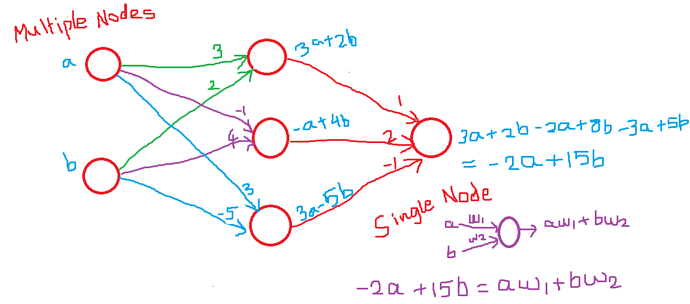

answer: [-2, 15]

# Support Vector Machines


## The advantages of support vector machines are:
Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
## The disadvantages of support vector machines include:
If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).